#torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data

Dataset stores the samples and their corresponding labels.
DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
start by  importing datasets : training_data = torchvision.datasets.CIFAR10 ( root =" the path to the file ", train = True  , transform = towhat? , download = True or false )
then import the dataloader that splits the dataset into batches : data_test = torchvision.dataloaders(data = "training_data",batch_size = int, shuflle = True or False )

Image classification is a core task in computer vision that involves assigning a label or category to an input image based on its visual content.

In [1]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mibenama\OneDrive - Capgemini\Documents\PyTorch\pytorch_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [11]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

print((training_data))

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


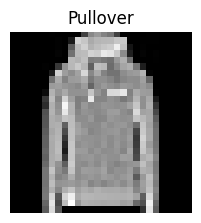

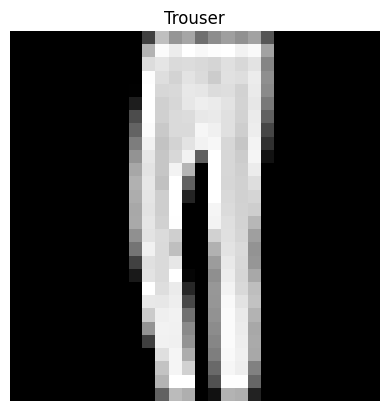

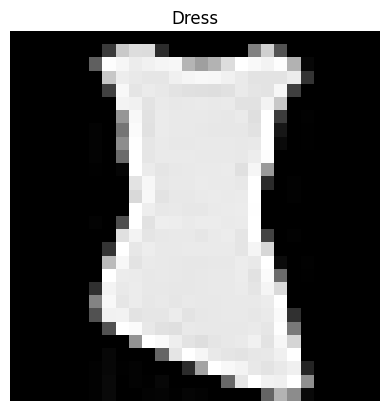

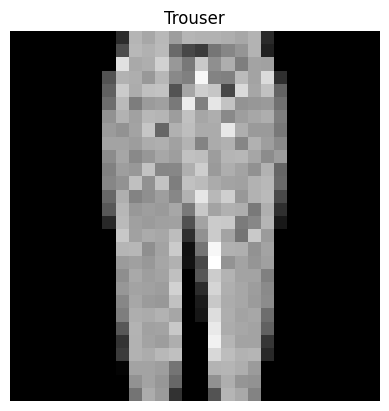

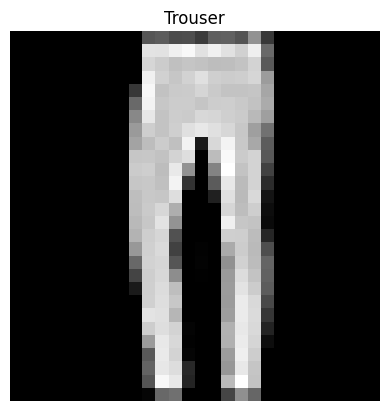

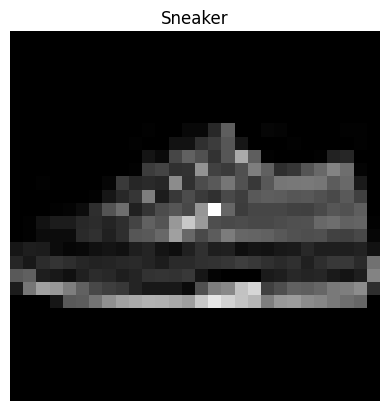

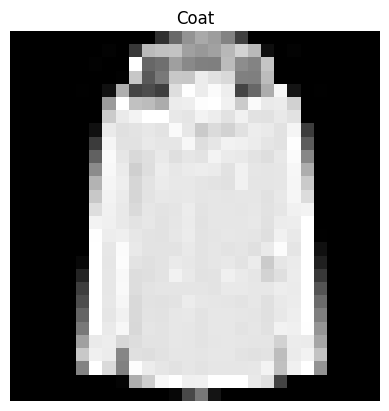

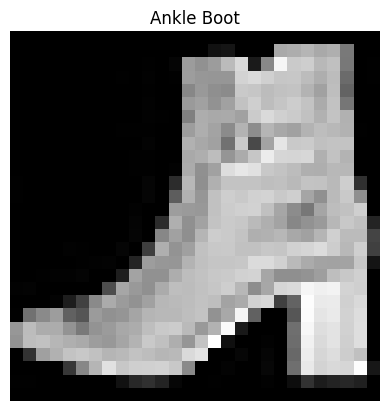

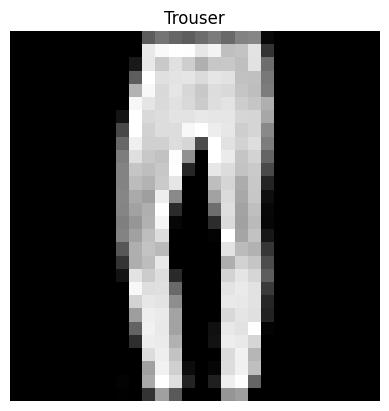

In [12]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",    
    
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # get a random index from the dataset to get a sample image and label
    img, label = training_data[sample_idx] # get the image and label
    figure.add_subplot(rows, cols, i) # add a subplot in the 3x3 grid
    plt.title(labels_map[label]) # set the title of the subplot to the label of the image
    plt.axis("off") # turn off the axis
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

In [7]:
help('matplotlib.pyplot.imshow')

Help on function imshow in matplotlib.pyplot:

matplotlib.pyplot.imshow = imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping u

In [ ]:
""" Creating a Custom Dataset for your files """ 
# import os
# import pandas as pd
# from torchvision.io import read_image

# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

No Python documentation found for 'squeeze'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [8]:
#Preparing data for training with DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
#suffle = True
#Avec cette option, les échantillons du dataset sont mélangés (aléatoirement réordonnés) à chaque époque d'entraînement.
# Le mélange (shuffle) est essentiel pour éviter que le modèle ne mémorise l'ordre des données, ce qui peut biaiser l'apprentissage et nuire à la généralisation.
#batch_size = 64 load 64 images at a time

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


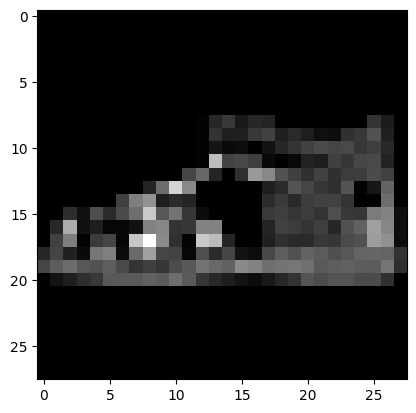

Label: 5


In [13]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [15]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
print(ds)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()


In [16]:
# Image Classification
import torch
from torchvision.transforms import v2

H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = transforms(img)